UCB


In [50]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

In [51]:
arms=int(input("Enter no of arms/actions: "))

In [52]:
q_star=[]
q_star=np.random.rand(arms)
q_star=q_star/q_star.sum()
print(q_star)
q_star.sum()

[0.12589823 0.05875745 0.093737   0.13600121 0.05780649 0.22062744
 0.14782432 0.11163384 0.02611532 0.02159869]


1.0

In [53]:
q_t_action=[]
n_t_a=[]
reward=[]
ucb=[]

In [54]:
q_t_action = [0.0] * arms  
n_t_a = [0] * arms         
reward = [0] * arms        
ucb = [float('inf')] * arms 
cumulative_reward = 0
cumulative_rewards_list = [] 


n_iter = 100
c = 1  

for i in range(1, n_iter + 1):
  
    if i == 1:
        action = random.choice(range(arms)) 
    else:
        action = ucb.index(max(ucb)) 
    
    
    num2 = np.random.random()   
    
    
    if num2 < q_star[action]:
        reward_action = 1
    else:
        reward_action = 0  
    
    reward[action] += reward_action
    n_t_a[action] += 1
    
    
    q_t_action[action] = q_t_action[action] + (reward_action - q_t_action[action]) / n_t_a[action]
    

    for a in range(arms):
        if n_t_a[a] > 0:
            ucb[a] = q_t_action[a] + (c * math.sqrt(math.log(i) / n_t_a[a]))
        else:
            ucb[a] = float('inf') 

    cumulative_reward += reward[action]
    cumulative_rewards_list.append(cumulative_reward) 
    

    print("---------------------------------------------")
    print("TIMESTAMP:", i)
    print("ACTION CHOSEN:", action + 1)  
    print("UPDATED REWARD FOR EACH ACTION:", reward)
    print("UPDATED ESTIMATED Q-T:", q_t_action)
    print("TOTAL NUMBER OF TIMES EACH ACTION WAS CHOSEN:", n_t_a)
    print("UCB VALUES:", ucb)


print("Final Q-values:", q_t_action)
print("Final UCB-values:", ucb)


---------------------------------------------
TIMESTAMP: 1
ACTION CHOSEN: 10
UPDATED REWARD FOR EACH ACTION: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
UPDATED ESTIMATED Q-T: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
TOTAL NUMBER OF TIMES EACH ACTION WAS CHOSEN: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
UCB VALUES: [inf, inf, inf, inf, inf, inf, inf, inf, inf, 0.0]
---------------------------------------------
TIMESTAMP: 2
ACTION CHOSEN: 1
UPDATED REWARD FOR EACH ACTION: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
UPDATED ESTIMATED Q-T: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
TOTAL NUMBER OF TIMES EACH ACTION WAS CHOSEN: [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
UCB VALUES: [0.8325546111576977, inf, inf, inf, inf, inf, inf, inf, inf, 0.8325546111576977]
---------------------------------------------
TIMESTAMP: 3
ACTION CHOSEN: 2
UPDATED REWARD FOR EACH ACTION: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
UPDATED ESTIMATED Q-T: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
TOTAL NUMBER OF TIMES EACH ACTION WAS CHOSEN: [1, 

<BarContainer object of 10 artists>

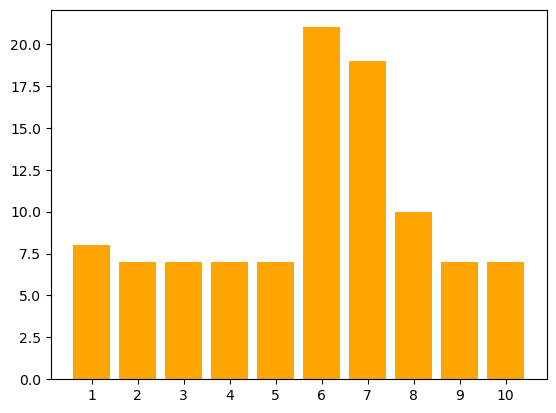

In [55]:
plt.bar(range(len(n_t_a)), n_t_a, tick_label=range(1,len(n_t_a)+1),color='orange')

<BarContainer object of 10 artists>

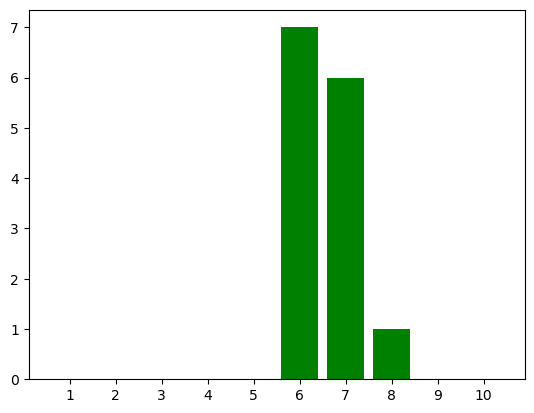

In [56]:
plt.bar(range(len(reward)), reward, tick_label=range(1,len(reward)+1),color='green')

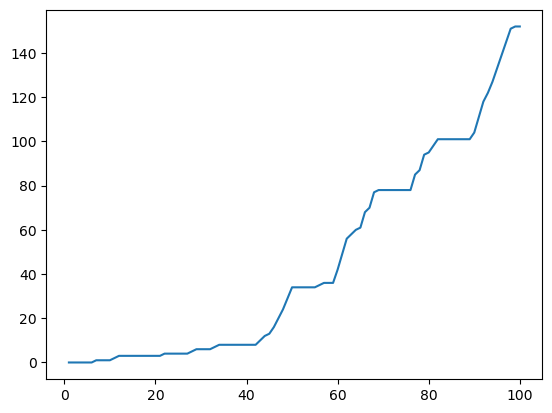

In [57]:
plt.plot(range(1,101),cumulative_rewards_list,label='Cumulative Reward')
